### 1차원 데이터


In [1]:
import numpy as np
import pandas as pd

# df = pd.read_csv('../통계/data/ch2_scores_em.csv', index_col = 'student number')
df = pd.read_csv('../4.통계/data/ch2_scores_em.csv', index_col = 'student number')

df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [2]:
scores = np.array(df.english)[: 10]

scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [3]:
scores_df = pd.DataFrame({'score' : scores}, index = list('ABCDEFGHIJ'))

scores_df

,score
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65
J,58


In [4]:
scores_df = pd.DataFrame({'score' : scores}, index = pd.Index(list('ABCDEFGHIJ'), name = 'student')) # 인덱스에 이름을 주기 위해서 pd.Index사용

scores_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


<AxesSubplot:ylabel='Frequency'>

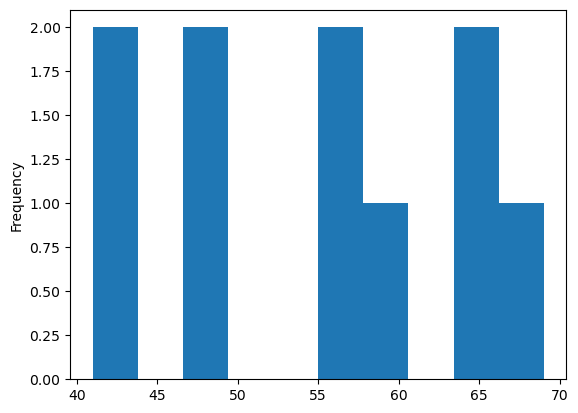

In [5]:
scores_df.score.plot(kind = 'hist')

In [6]:
# 평균값 - 배열

sum(scores) / len(scores)

np.mean(scores)

55.0

In [7]:
# 평균값 - 데이터 프레임

scores_df.mean()

score    55.0
dtype: float64

In [8]:
# 중앙값

np.median(scores)

scores_df.median()

score    56.5
dtype: float64

In [9]:
scores1 = np.sort(scores)

scores1

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69], dtype=int64)

In [10]:
n = len(scores1)

if (n % 2 == 1) :
    score_m = scores1[n // 2]
    print(score_m)
    
else :
    score_m = (scores1[n // 2 - 1] + scores1[n // 2]) / 2
    print(score_m)

56.5


In [11]:
# 최빈값 =  데이터 집합에서 가장 자주 등장하는 값

scores_df.mode()

,score
0,65


In [12]:
pd.Series(scores1).mode()

0    65
dtype: int64

In [13]:
scores_df.describe()

,score
count,10.000000
mean,55.000000
std,9.775252
min,41.000000
25%,48.250000
50%,56.500000
75%,63.250000
max,69.000000


<AxesSubplot:xlabel='score', ylabel='Density'>

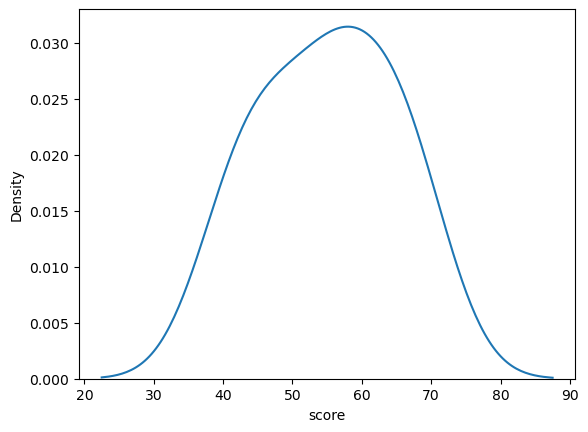

In [14]:
import seaborn as sns

sns.kdeplot(data = scores_df, x = 'score')

<AxesSubplot:xlabel='score', ylabel='Count'>

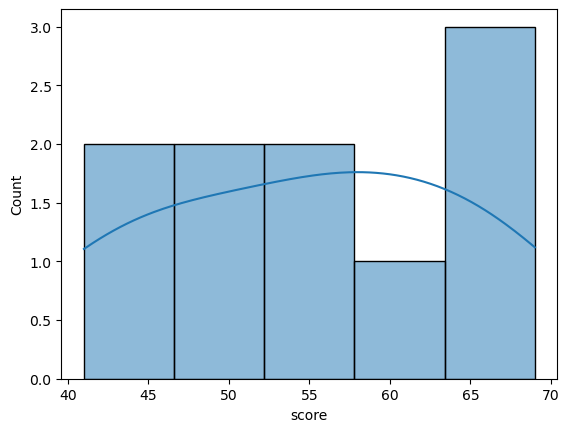

In [15]:
sns.histplot(data = scores_df, x = 'score', kde = True)

<AxesSubplot:xlabel='score', ylabel='Density'>

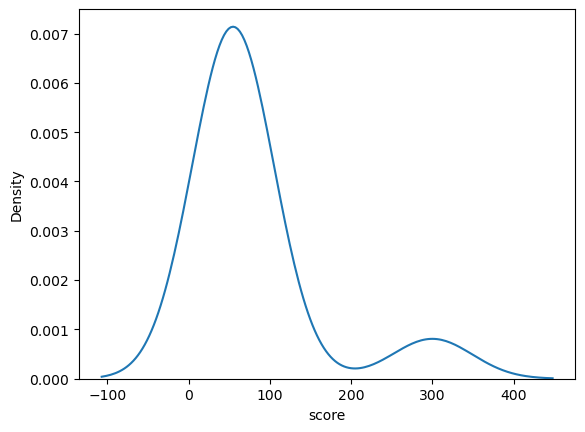

In [16]:
scores_df.iloc[9, 0] = 300

sns.kdeplot(data = scores_df, x = 'score')

<AxesSubplot:xlabel='score', ylabel='Count'>

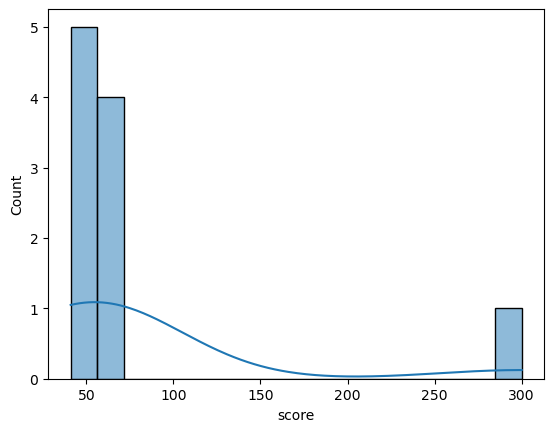

In [17]:
# 평균이 중앙값 보다 오른쪽

sns.histplot(data = scores_df, x = 'score', kde = True)

In [18]:
scores_df.describe()

,score
count,10.000000
mean,79.200000
std,78.187524
min,41.000000
25%,48.250000
50%,56.500000
75%,65.000000
max,300.000000


<AxesSubplot:xlabel='score', ylabel='Count'>

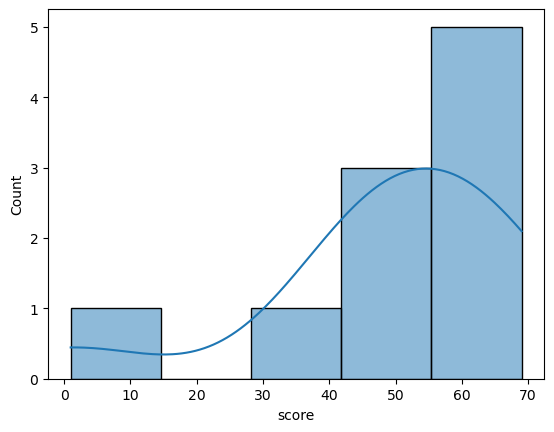

In [19]:
# 평균이 중앙 값 보다 왼쪽

scores_df.iloc[9, 0] = 1

sns.histplot(data = scores_df, x = 'score', kde = True)

In [20]:
scores_df.describe()

,score
count,10.000000
mean,49.300000
std,19.556471
min,1.000000
25%,43.500000
50%,52.500000
75%,63.000000
max,69.000000


### 데이터의 산포도 지표

In [21]:
# 분산과 표준편차
# 편차 (deviation)

mean = np.mean(scores)

print(mean)
print(scores)

deviation = scores - mean

print(deviation)

55.0
[42 69 56 41 57 48 65 49 65 58]
[-13.  14.   1. -14.   2.  -7.  10.  -6.  10.   3.]


In [22]:
# 편차의 합, 평균은 0

sum(deviation)

np.mean(deviation)

0.0

#### 분산
- Numpy와 Pandas는 서로 다른 분산을 기본으로 설정하여 계산. 
 * Numpy는 표본분산, Pandas는 불편분산
 * Pandas에서 표본분산을 계산하려면 var 메소드의 인수를 ddof=0이라고 설정, 불편분산은 ddof=1일 때 해당됨
 
[표본분산이 분산을 과소평가하는 이유]

- 분산은 '데이터와 평균값의 간의 거리' 이므로 모평균 간의 거리를 계산 : np.sum((fish_data - mu)**2)/N  
호수안에 물고기가 7마리 있다. 몸길이 {1,2,3,4,5,6,7}, 모평균 4,  
샘플링 3마리 {1,2,3} 표본평균 2  
이때 분산은 모평균을 모르기 때문에 표본평균과의 거리를 계산하며 분산을 과소평가 하게된다.
- 표본 분산 보다 조금 더 큰 값이 되도록 보정하기 위하여 N 대신 N-1로 나누어 불편분산을 구할 수 있다.

In [23]:
# numpy - 표본분산

np.mean(deviation ** 2)

np.var(scores)

86.0

In [24]:
# pandas - 표본분산 

scores_df.var(ddof = 0)

score    344.21
dtype: float64

In [25]:
# numpy - 불편분산

np.var(scores, ddof = 1)

95.55555555555556

In [26]:
# pandas - 불편분산 = 편향을 보정해준다

scores_df = pd.DataFrame({'score' : scores}, index = pd.Index(list('ABCDEFGHIJ'), name = 'student'))

scores_df.var()

score    95.555556
dtype: float64

In [27]:
# 표준편차 - sqrt = root

np.sqrt(np.var(scores, ddof = 0))

np.std(scores, ddof = 0)

9.273618495495704

### 범위와 4분위수

In [28]:
# 범위

np.max(scores) - np.min(scores)

28

In [29]:
# 4분위 범위

scores_Q1 = np.percentile(scores, 25)
scores_Q3 = np.percentile(scores, 75)

scores_IQR = scores_Q3 - scores_Q1 

scores_IQR

15.0

In [30]:
pd.Series(scores).describe()

count    10.000000
mean     55.000000
std       9.775252
min      41.000000
25%      48.250000
50%      56.500000
75%      63.250000
max      69.000000
dtype: float64

In [31]:
# 데이터의 정규화 

print(scores)
print(f'평균 : {scores.mean()}, 표준편차 : {scores.std().round(4)}')

[42 69 56 41 57 48 65 49 65 58]
평균 : 55.0, 표준편차 : 9.2736


In [32]:
# 표준화

z = (scores - np.mean(scores)) / np.std(scores)
z

array([-1.40182605,  1.50965882,  0.10783277, -1.50965882,  0.21566555,
       -0.75482941,  1.07832773, -0.64699664,  1.07832773,  0.32349832])

In [33]:
55.0 + z * scores.std()

array([42., 69., 56., 41., 57., 48., 65., 49., 65., 58.])

In [34]:
# 데이터의 시각화

english_scores = np.array(df.english)
pd.Series(english_scores).describe()

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
dtype: float64

In [35]:
# 도수 분포표

freq, _ = np.histogram(english_scores, bins = 10, range = (0, 100))

freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

In [36]:
freq_class = [f'{i} ~ {i + 10}' for i in range(0, 100, 10)]

freq_dist_df = pd.DataFrame({'frequency' : freq}, index = pd.Index(freq_class, name = 'class'))

freq_dist_df

,frequency
class,
0 ~ 10,0
10 ~ 20,0
20 ~ 30,0
30 ~ 40,2
40 ~ 50,8
50 ~ 60,16
60 ~ 70,18
70 ~ 80,6
80 ~ 90,0


<AxesSubplot:xlabel='frequency', ylabel='Count'>

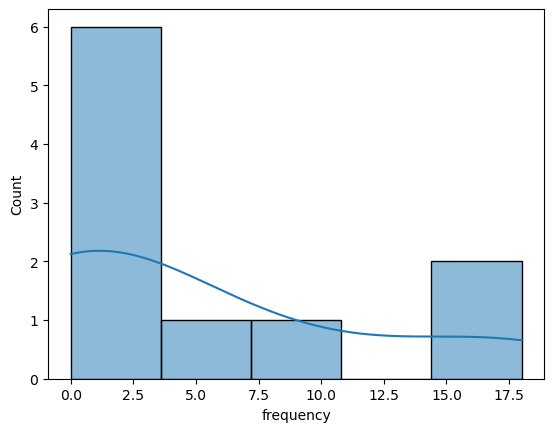

In [37]:
sns.histplot(data = freq_dist_df, x = 'frequency', kde = True)

In [38]:
# 계급값 : 각 계급을 대표하는 값으로 계급의 중앙값이 이용됨

class_value = [(i + (i + 10)) // 2 for i in range(0, 100, 10)]

class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [39]:
# 상대 도수 : 해당 계급 데이터의 상대적인 비율

rel_freq = freq / freq.sum()

rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [40]:
# 누적 상대도수 : 해당 계급까지의 상대도수의 합

cum_rel_freq = np.cumsum(rel_freq)

cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [41]:
freq_dist_df['class_value'] = class_value
freq_dist_df['relative_frequency'] = rel_freq
freq_dist_df['cumlative_frequency'] = cum_rel_freq

freq_dist_df = freq_dist_df[['class_value', 'frequency', 'relative_frequency', 'cumlative_frequency']]

freq_dist_df

,class_value,frequency,relative_frequency,cumlative_frequency
class,,,,
0 ~ 10,5,0,0.00,0.00
10 ~ 20,15,0,0.00,0.00
20 ~ 30,25,0,0.00,0.00
30 ~ 40,35,2,0.04,0.04
40 ~ 50,45,8,0.16,0.20
50 ~ 60,55,16,0.32,0.52
60 ~ 70,65,18,0.36,0.88
70 ~ 80,75,6,0.12,1.00
80 ~ 90,85,0,0.00,1.00


In [42]:
# 최빈값

freq_dist_df.loc[freq_dist_df.frequency.idxmax(), 'class_value']

65

(array([ 0.,  0.,  0.,  2.,  8., 16., 18.,  6.,  0.,  0.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

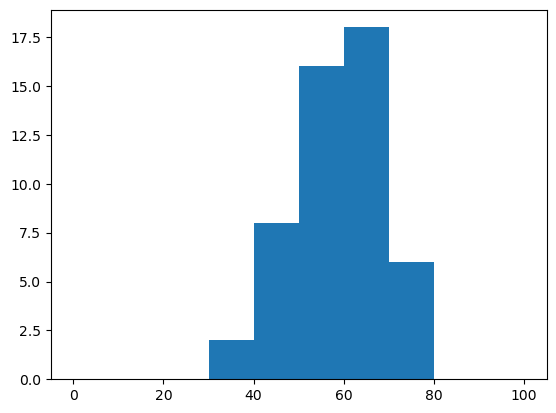

In [43]:
import matplotlib.pyplot as plt

plt.hist(english_scores, bins = 10, range = (0, 100))

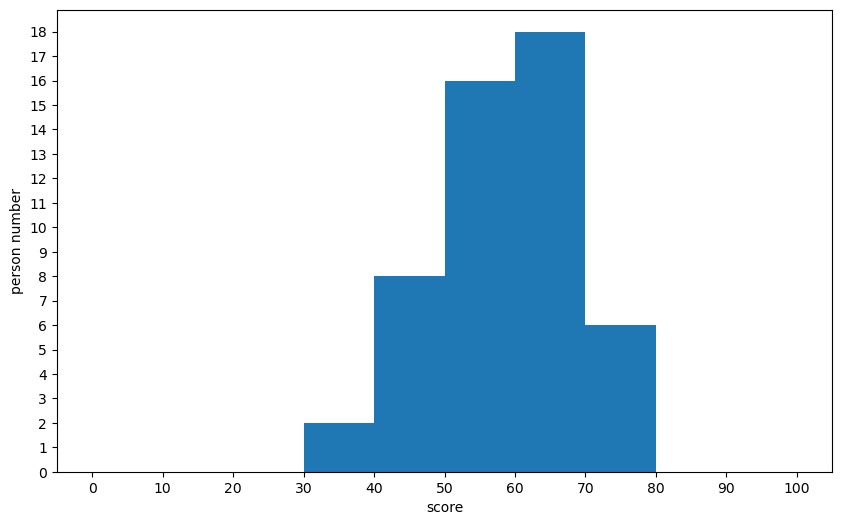

In [44]:
# 히스토그램 :  도수분포표를 막대그래프로 표현

import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10, 6))

ax = fig.add_subplot(1, 1, 1)

freq, _, _ = ax.hist(english_scores, bins = 10, range = (0, 100)) 

ax.set_xlabel('score')
ax.set_ylabel('person number')
ax.set_xticks(np.linspace(0, 100, 10 + 1))
ax.set_yticks(np.arange(0, freq.max() + 1))

plt.show()

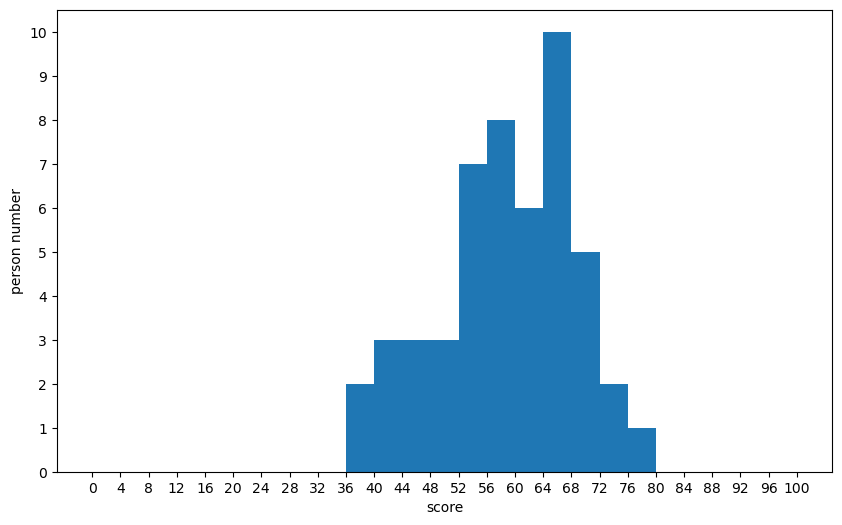

In [45]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10, 6))

ax = fig.add_subplot(1, 1, 1)

freq, _, _ = ax.hist(english_scores, bins = 25, range = (0, 100)) 

ax.set_xlabel('score')
ax.set_ylabel('person number')
ax.set_xticks(np.linspace(0, 100, 25 + 1))
ax.set_yticks(np.arange(0, freq.max() + 1))

plt.show()

###  과제
- 클래스별 빈도를 나타내는 히스토그램에 추가하여 상대도수(y축 오른쪽)와 누적 상대도수(y축 왼쪽)를 꺽은선 그래프로 표현하세요.

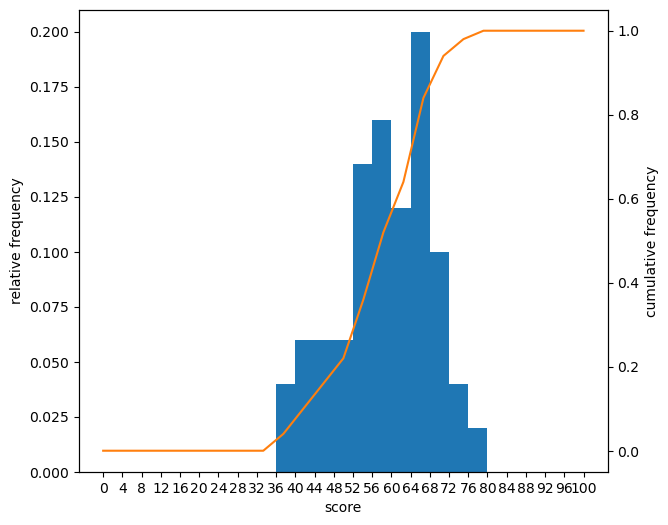

In [46]:
fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(1, 2, 1)

# 영어 성적 데이터에 대한 상대도수 계산
weights = np.ones_like(english_scores) / len(english_scores)

rel_freq, _, _ = ax1.hist(english_scores, bins = 25, range = (0, 100), weights = weights)

ax1.set_xlabel('score')
ax1.set_ylabel('relative frequency')
ax1.set_xticks(np.linspace(0, 100, 25 + 1))

# 왼쪽 y축을 이용하여 누적 상대도수 계산
ax2 = ax1.twinx()

cum_freq = np.cumsum(rel_freq)

ax2.plot(np.linspace(0, 100, 25), cum_freq, color = 'C1')

ax2.set_ylabel('cumulative frequency')

plt.show()

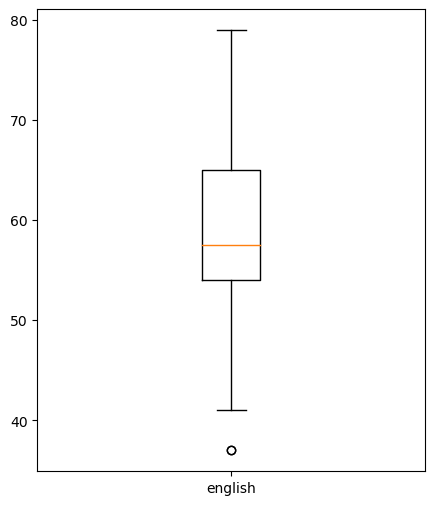

In [47]:
# box plot
import warnings

warnings.filterwarnings('ignore')

plt.figure(figsize = (5, 6))

plt.boxplot(english_scores, labels = ['english'])

plt.show()

In [48]:
english_scores = np.array(df.english)
pd.Series(english_scores).describe()

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
dtype: float64

### 과제 

타이타닉 데이터 셋에서 age, pclass fare sex embarked 컬럼 중 2개를 선택하여 각 컬럼의 특징을 설명하고 종속 변수인 survived 와의 관계를 기술하세요

- 각 컬럼에 대한 전처리 후 기초 통계량 시각화를 통한 분포 및 특징 탐색 이상치 여부 탐색
- 선택한 컬럼을 가장 잘 활용 할 수 있는 형태로 변환


In [49]:
# df = pd.read_csv('../dataset/dataset_base/titanic3.csv')
df = pd.read_csv('../2.판다스/dataset/dataset_base/titanic3.csv')

df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [50]:
df.age.isnull().sum()

263

               age
count  1309.000000
mean     29.503186
std      12.905241
min       0.170000
25%      22.000000
50%      28.000000
75%      35.000000
max      80.000000


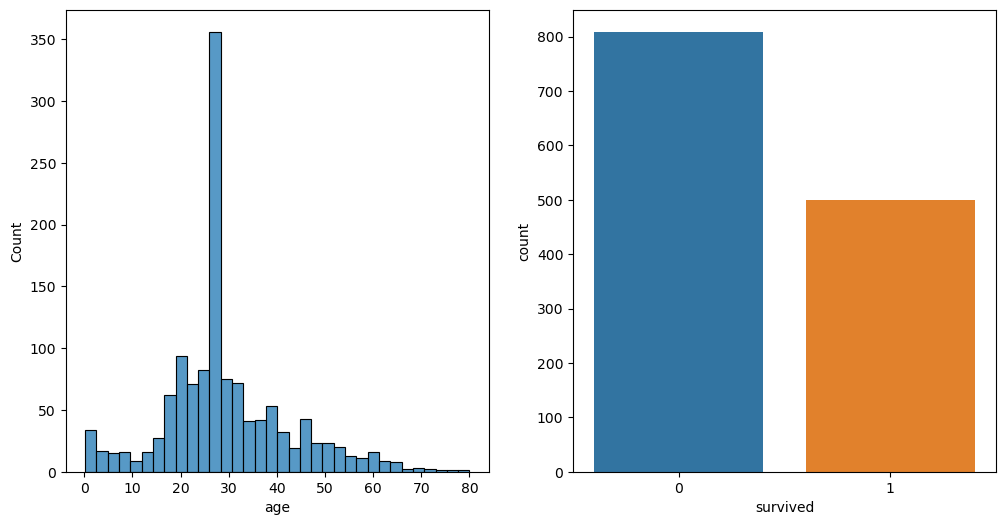

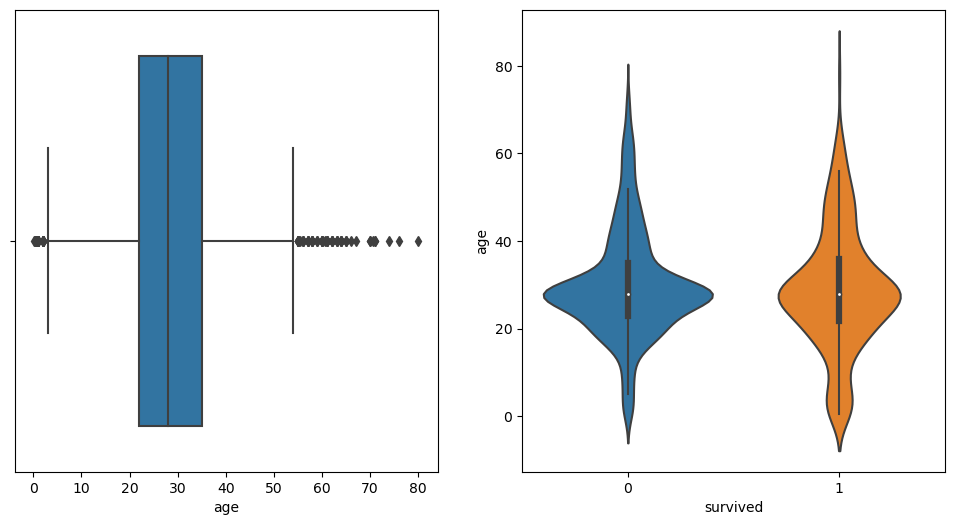

In [51]:
df['age'] = df['age'].fillna(df['age'].median())


df['survived'] = df['survived'].astype('category')


print(df[['age', 'survived']].describe())


fig, axs = plt.subplots(ncols = 2, figsize = (12, 6))
sns.histplot(data = df, x = 'age', ax = axs[0])
sns.countplot(data = df, x = 'survived', ax = axs[1])
plt.show()


fig, axs = plt.subplots(ncols = 2, figsize = (12, 6))
sns.boxplot(data = df, x = 'age', ax = axs[0])
sns.violinplot(data = df, x = 'survived', y = 'age', ax = axs[1])
plt.show()

In [52]:
df.sex.isnull().sum()

0

               sex
count  1309.000000
mean      0.355997
std       0.478997
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000


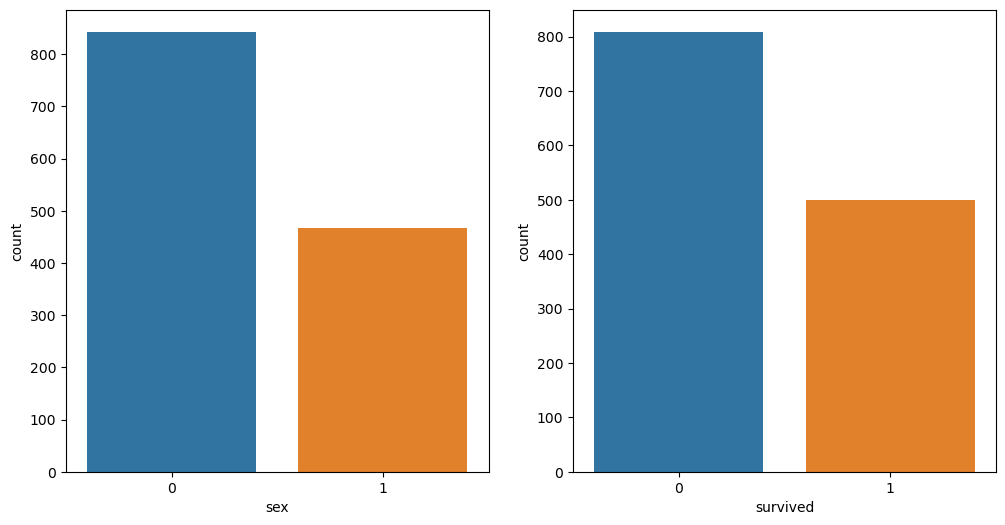

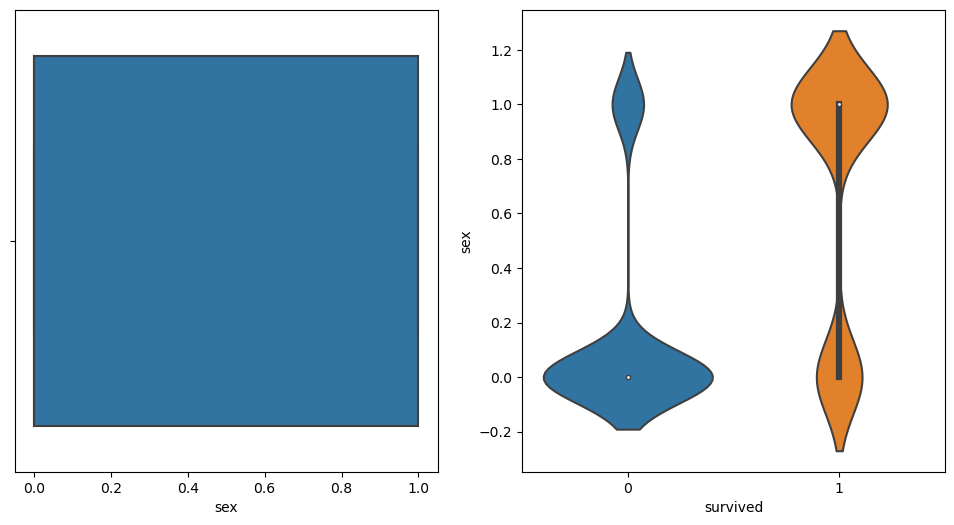

In [53]:
df.sex = df.sex.replace({'male' : 0, 'female' : 1})

print(df[['sex', 'survived']].describe())

fig, axs = plt.subplots(ncols = 2, figsize = (12, 6))

sns.countplot(data = df, x = 'sex', ax = axs[0])
sns.countplot(data = df, x = 'survived', ax = axs[1])

plt.show()


fig, axs = plt.subplots(ncols = 2, figsize = (12, 6))

sns.boxplot(data = df, x = 'sex', ax = axs[0])
sns.violinplot(data = df, x = 'survived', y = 'sex', ax = axs[1])

plt.show()


### 2차원 데이터


In [56]:
import numpy as np
import pandas as pd

# df = pd.read_csv('../통계/data/ch2_scores_em.csv', index_col = 'student number')
df = pd.read_csv('../4.통계/data/ch2_scores_em.csv', index_col = 'student number')

df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [57]:
en_scores = np.array(df['english'])[: 10]
ma_scores = np.array(df['mathematics'])[: 10]

scores_df = pd.DataFrame({'english' : en_scores,
                         'mathematics' : ma_scores},
                        index = pd.Index(list('ABCDEFGHIJ'), name = 'student'))

scores_df

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


In [58]:
# 공분산 = 두 변수가 함께 변하는 경향을 나타내는 통계적 척도
# 공분산이 양수인 경우 한 변수가 증가할 때 다른 변수도 증가하는 경향이 있으며, 
# 음수인 경우 한 변수가 증가할 때 다른 변수는 감소하는 경향이 있습니다. 
# 공분산이 0에 가까운 경우 두 변수 사이에는 거의 상관관계가 없다고 볼 수 있습니다.

summary_df = scores_df.copy()

summary_df['english_deviation'] = summary_df.english - summary_df.english.mean()
summary_df['mathematics_deviation'] = summary_df.mathematics - summary_df.mathematics.mean()
summary_df['product of devitation'] = summary_df['english_deviation'] * summary_df['mathematics_deviation']

summary_df

,english,mathematics,english_deviation,mathematics_deviation,product of devitation
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [59]:
print(np.var(scores_df.english))
print(np.var(scores_df.mathematics))

86.0
68.44000000000001


In [60]:
summary_df['product of devitation'].mean()

62.8

In [61]:
np.cov(en_scores, ma_scores, ddof = 0)

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [62]:
# default 는 n-1로 나눔 =  ddof = 1

np.cov(en_scores, ma_scores, ddof = 1)

array([[95.55555556, 69.77777778],
       [69.77777778, 76.04444444]])

In [63]:
# 상관계수

np.cov(en_scores, ma_scores, ddof = 0)[0, 1] / (np.std(en_scores) * np.std(ma_scores))

0.8185692341186713

In [64]:
np.corrcoef(en_scores, ma_scores)

array([[1.        , 0.81856923],
       [0.81856923, 1.        ]])

In [65]:
scores_df.corr()

,english,mathematics
english,1.000000,0.818569
mathematics,0.818569,1.000000


### 과제3

타이타닉 데이터 셋에서 age pclass fare sex embarked 컬럼중 2개의 쌍을 선택하여 공분산 행열 및 상관계수 행열을 각각 구하여 비고하세요.

In [69]:
# df = pd.read_csv('../dataset/dataset_base/titanic3.csv')
df = pd.read_csv('../2.판다스/dataset/dataset_base/titanic3.csv')

df = df[['age', 'pclass', 'fare', 'sex', 'embarked']]

df

,age,pclass,fare,sex,embarked
0,29.00,1,211.3375,female,S
1,0.92,1,151.5500,male,S
2,2.00,1,151.5500,female,S
3,30.00,1,151.5500,male,S
4,25.00,1,151.5500,female,S
...,...,...,...,...,...
1304,14.50,3,14.4542,female,C
1305,NaN,3,14.4542,female,C
1306,26.50,3,7.2250,male,C
1307,27.00,3,7.2250,male,C


In [70]:
df = df[['age', 'pclass', 'fare', 'sex', 'embarked']]

df = df.dropna()

df['sex'] = df['sex'].replace({'male': 0, 'female': 1})

# 선택한 두 개의 쌍에 대한 공분산 행렬 계산
cov1 = df[['pclass', 'fare']].cov()
cov2 = df[['age', 'sex']].cov()

# 선택한 두 개의 쌍에 대한 상관계수 행렬 계산
corr1 = df[['pclass', 'fare']].corr()
corr2 = df[['age', 'sex']].corr()

print('pclass, fare 쌍의 공분산 행렬 : \n\n', cov1,'\n')
print('age, sex 쌍의 공분산 행렬 : \n\n', cov2,'\n')
print('pclass, fare 쌍의 상관계수 행렬 :\n\n', corr1,'\n')
print('age, sex 쌍의 상관계수 행렬 : \n\n', corr2,'\n')

pclass, fare 쌍의 공분산 행렬 : 

            pclass         fare
pclass   0.706752   -26.461562
fare   -26.461562  3108.469232 

age, sex 쌍의 공분산 행렬 : 

             age       sex
age  206.389267 -0.458067
sex   -0.458067  0.233346 

pclass, fare 쌍의 상관계수 행렬 :

           pclass      fare
pclass  1.000000 -0.564558
fare   -0.564558  1.000000 

age, sex 쌍의 상관계수 행렬 : 

           age       sex
age  1.000000 -0.066006
sex -0.066006  1.000000 



Text(0, 0.5, 'mathematices')

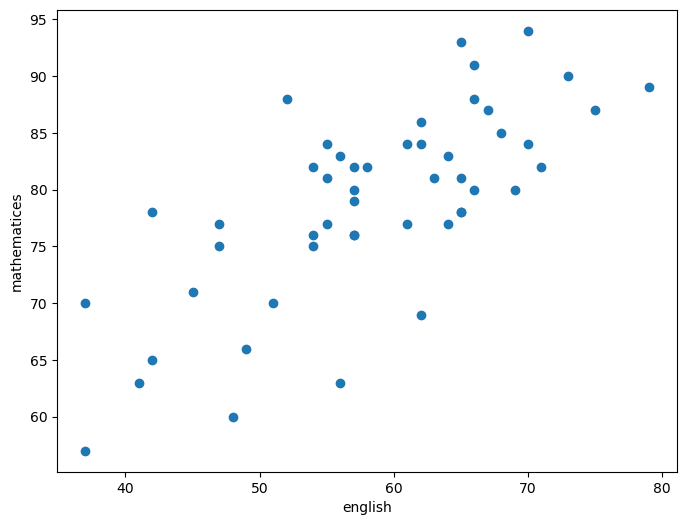

In [74]:
# 2차원 데이터의 시각화

import matplotlib .pyplot as plt

df = pd.read_csv('../4.통계/data/ch2_scores_em.csv', index_col = 'student number')

english_scores = np.array(df.english)
math_scores = np.array(df.mathematics)

plt.figure(figsize = (8, 6))
plt.scatter(english_scores, math_scores)
plt.xlabel('english')
plt.ylabel('mathematices')


<AxesSubplot:xlabel='english', ylabel='mathematics'>

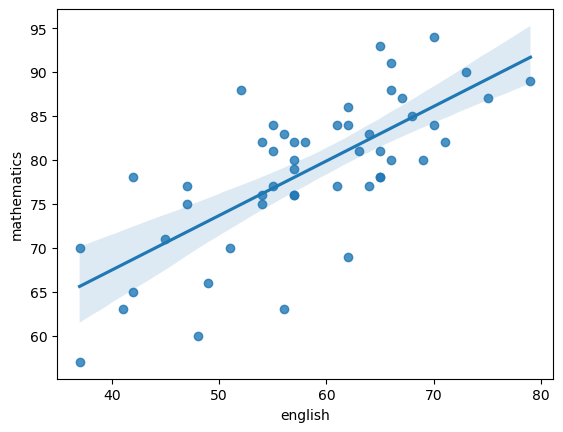

In [75]:
import seaborn as sns

sns.regplot(data = df, x = 'english', y = 'mathematics')

In [76]:
# 회귀 직선 구하기

poly_fit = np.polyfit(english_scores, math_scores, 1)
poly_1d = np.poly1d(poly_fit)
eq = f'{poly_fit[1] : .2f} + {poly_fit[0] : .2f}x'
eq

' 42.60 +  0.62x'

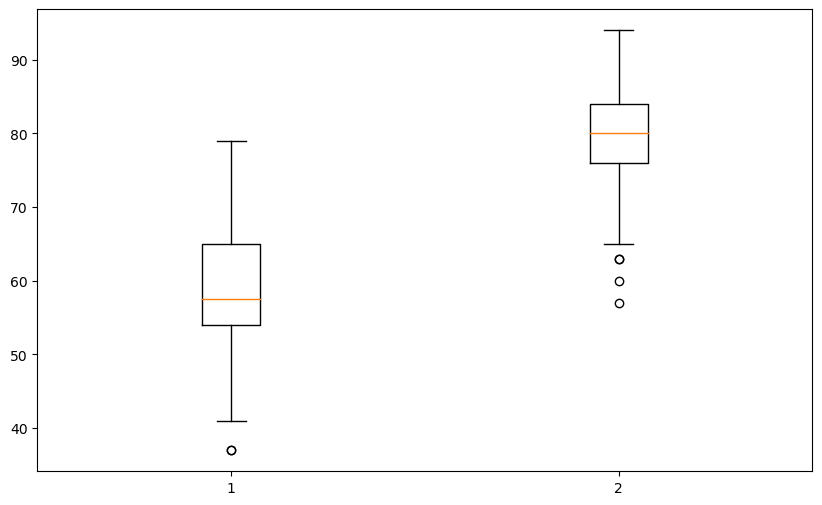

In [77]:
# sns.boxplot(data = df, x = 'english')
# sns.boxplot(data = df, x = 'mathematics')

plt.figure(figsize = (10, 6))
 
plt.boxplot([english_scores, math_scores])

plt.show()

### 과제1

english 와 mathematics 2차원 데이터간의 관계를 파악 할 수 있는 시각화를 수행하세요.

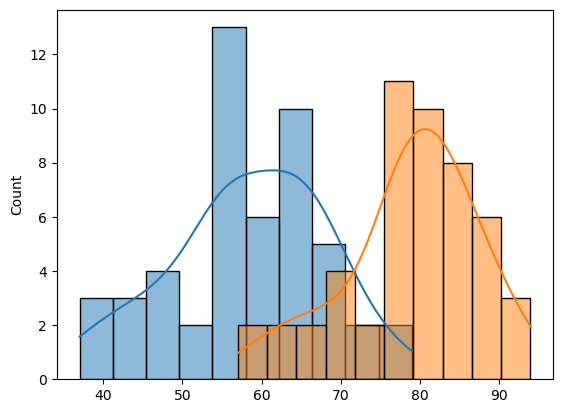

In [80]:
df = pd.read_csv('../4.통계/data/ch2_scores_em.csv', index_col = 'student number')

english_scores = np.array(df.english)
math_scores = np.array(df.mathematics)

# fig, ax = plt.subplots(ncols = 2, figsize = (10,6))

ax1 = sns.histplot(english_scores, bins = 10, kde = True)
# ax1.set_xlabel('english')

ax1 = sns.histplot(math_scores, bins = 10, kde = True)
# ax2.set_xlabel('mathematics')

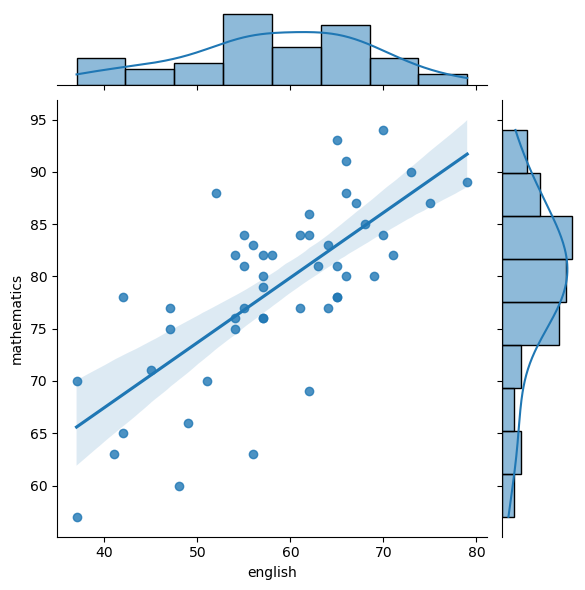

In [81]:
sns.jointplot(data = df, x = 'english', y = 'mathematics', kind = 'reg')

plt.show()

<AxesSubplot:>

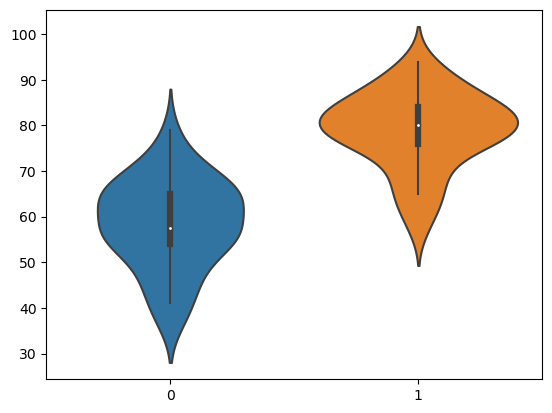

In [82]:
sns.violinplot([english_scores, math_scores])

<AxesSubplot:>

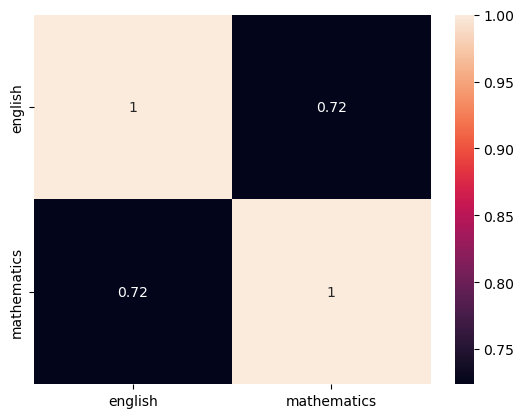

In [83]:
# 히트맵

sns.heatmap(df[['english', 'mathematics']].corr(), annot = True)